# Understanding college debt
I want to see what types of universities have students in debt.  We will be using the college scorecard API from data.gov.  I am interested in a number of variables, these are admissions rate, tuition, median household income, student size, etc.

It seems that the UC office of president <a href="http://www.ucop.edu/institutional-research-academic-planning/_files/College%20Scorecard%20Brief.pdf">claims that the UC schools are a good deal</a> based on data from the college scorecard.

You should go begin by getting an <a href="https://api.data.gov/signup/">API key for data.gov</a>.  There are many data.gov APIs that you can use this key for and they have fairly relaxed limits on the number of requests.

The documentation for the API can be found here...<br>
https://github.com/RTICWDT/open-data-maker/blob/master/API.md<br>
https://collegescorecard.ed.gov/data/

Let's import some packages.

In [1]:
from urllib2 import Request, urlopen
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Here are some variable names that we will be interested in.

In [2]:
varnames = """id
school.name
school.degrees_awarded.predominant
2014.admissions.admission_rate.overall
2014.cost.tuition.in_state
2014.cost.tuition.out_of_state
2014.aid.median_debt.completers.overall
2014.aid.median_debt.noncompleters
2005.student.demographics.median_hh_income
2005.student.demographics.poverty_rate
2014.aid.federal_loan_rate
2014.aid.pell_grant_rate
2014.student.size"""

__Exercise (1)__ I would like to make a complicated query from the API.  An example query from the API is 

<pre>https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&_fields=school.name,
2014.aid.pell_grant_rate&_sort=2014.student.size:desc&_page=1
&_per_page=100&api_key=YOURKEY
</pre>

Which can be parsed as  
1. the base url: https://api.data.gov/ed/collegescorecard/v1/schools.json, 
2. a filter of school.degrees_awarded.predominant=3, 
3. return the fields school.name,2014.aid.pell_grant_rate, 
4. sort by 2014.student.size in descending order, 
5. return 1 page of 100 entries, 
6. and use your api key

You can find a more complete description: https://github.com/RTICWDT/open-data-maker/blob/master/API.md

Fill in the following def that fits the following docstring, and gives the shown output.
<pre>
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: JSON object
    """


query_url(key,fieldnames,'school.degrees_awarded.predominant=3',
  '2014.student.size',2)

https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3,4&_fields=id,school.name,school.degrees_awarded.predominant,school.degree_urbanization,2014.admissions.admission_rate.overall,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.student.size&_page=2&_per_page=100&_sort=2014.student.size:desc&api_key=YOURKEYHERE
</pre>

Try to reproduce the above behavior.

In [3]:
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: JSON object
    """
    fieldnames = ','.join(fieldnames.split("\n"))
    school_uri = "https://api.data.gov/ed/collegescorecard/v1/schools.json?{2}&_fields={1}&_sort={3}:desc&_page={4}&_per_page=100&api_key={0}".format(key,fieldnames, filterstring,sortvar,numpages)
    return(school_uri)

key = 'Gb82G6ArSzlgr9oRoEm3s7WUt2MG4ZoMZEwsl4a1'
query_url(key,varnames,'school.degrees_awarded.predominant=3,4','2014.student.size',2)

'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3,4&_fields=id,school.name,school.degrees_awarded.predominant,2014.admissions.admission_rate.overall,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.student.size&_sort=2014.student.size:desc&_page=2&_per_page=100&api_key=Gb82G6ArSzlgr9oRoEm3s7WUt2MG4ZoMZEwsl4a1'

__Exercise (2)__ Make the query using Request and load the results into a DataFrame that makes sense.

In [4]:
request = Request(query_url(key,varnames,'school.degrees_awarded.predominant=3,4','2014.student.size',2))
response = urlopen(request)
js = json.loads(response.read())
schoolDF = pd.DataFrame(js[u'results'], columns = varnames.split("\n"))

__Exercise (3)__ Produce scatterplots to demonstrate the associations between student debt (for 'completers') and median household income, pell grant rates, student poverty rate, tuition, and federal loan rate.  Do you have an explanation for the associations that you are seeing?  Are there some surprising associations.

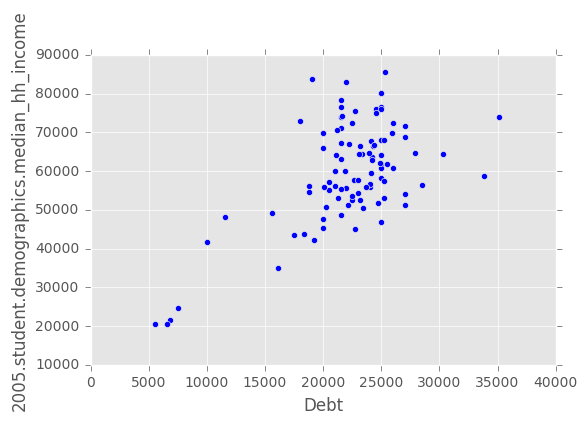

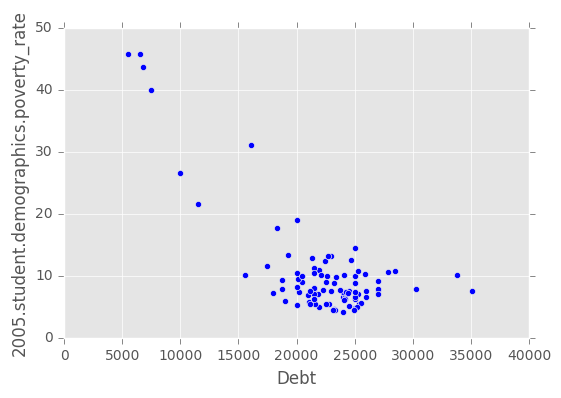

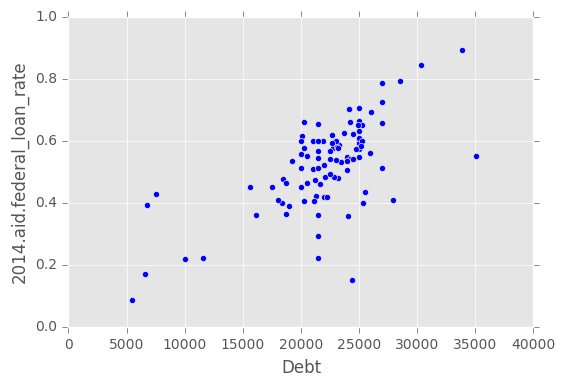

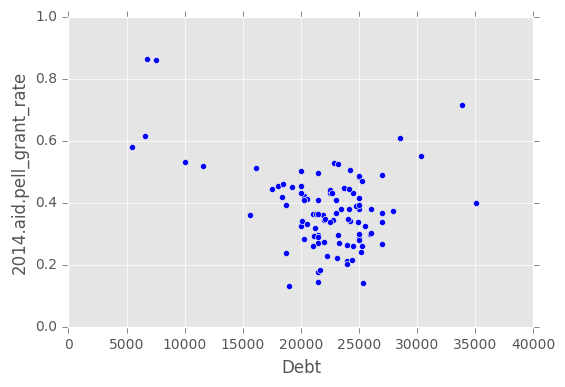

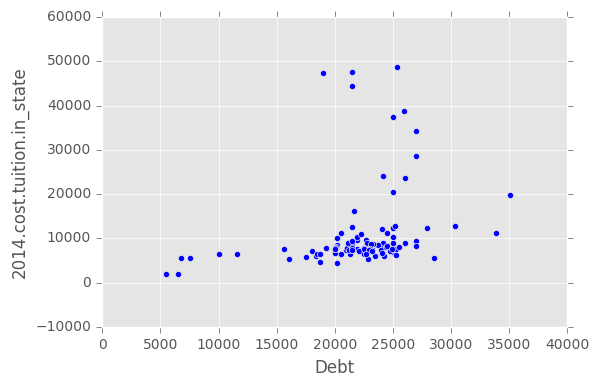

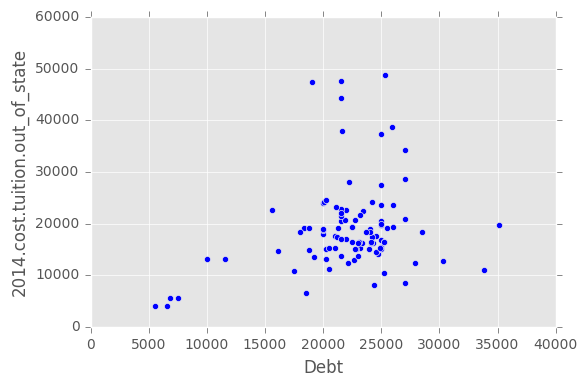

In [26]:
import numpy as np
interestedVars = ['2005.student.demographics.median_hh_income',
                  '2005.student.demographics.poverty_rate',
                  '2014.aid.federal_loan_rate',
                  '2014.aid.pell_grant_rate',
                  '2014.cost.tuition.in_state',
                  '2014.cost.tuition.out_of_state']
#Loop through to generate the different scatter plots
for var in interestedVars: 
    plt.scatter(schoolDF['2014.aid.median_debt.completers.overall'],
            schoolDF[var])
    plt.xlabel('Debt')
    plt.ylabel(var)
    plt.show()

In [45]:
#Examine correlation Matrix
tmp = ['2014.aid.median_debt.completers.overall'] + interestedVars
schoolDF[tmp].corr()

,2014.aid.median_debt.completers.overall,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state
2014.aid.median_debt.completers.overall,1.000000,0.619645,-0.756203,0.659280,-0.352104,0.256532,0.259161
2005.student.demographics.median_hh_income,0.619645,1.000000,-0.806067,0.249130,-0.665203,0.531619,0.622187
2005.student.demographics.poverty_rate,-0.756203,-0.806067,1.000000,-0.451018,0.695159,-0.247604,-0.413563
2014.aid.federal_loan_rate,0.659280,0.249130,-0.451018,1.000000,0.125400,-0.028997,-0.005661
2014.aid.pell_grant_rate,-0.352104,-0.665203,0.695159,0.125400,1.000000,-0.430651,-0.571536
2014.cost.tuition.in_state,0.256532,0.531619,-0.247604,-0.028997,-0.430651,1.000000,0.841219
2014.cost.tuition.out_of_state,0.259161,0.622187,-0.413563,-0.005661,-0.571536,0.841219,1.000000


We see that there is a positive association between debt and median household income, federal loan rate, and tuition. There is a negative association between debt and poverty rate, and pell grand rate. 
The positive association between debt and median household income may be due to the fact that as median household income increase, students are less elligble for grants. Therefore they turn toward loans instead. This phenomenon also explains how as poverty rate goes down debt goes up, since less people getting grants will lead to more people using loans to pay for tuition. Pell grant rate shows a parabola relationship with debt. The debt and tuition positive correlation make sense, since higher the tuition, more debt people are going to take. Some surprising associations are the strong positive correlation between federal loan rate and debt. I expected debt to decrease when loan rate go up, because people are less likely to want to borrow. However, I guess some people have to borrow to pay for tuition, so the higher the loan rate the bigger the debt. I do not know how to explain the parabola behavior of pell grant rate with debt.